In [154]:
library(fma)
library(fpp)
library(forecast)


# Function to plot the 4 Holt Methods together with user supplied values
holtPlotsDifferentMethodsSameAlphaBeta = function(forecastLength, alphaVal, betaVal) {
    xLimBeg = start(eggs)[1]
    xLimEnd = end(eggs)[1] + forecastLength + 4
    yLimBeg = -10
    yLimEnd = max(eggs) + 20
    
    # Cannot have beta bigger than alpha
    if (betaVal > alphaVal){
        betaVal = alphaVal
    }
    
    # Holt Additive Method
    holtAdd = holt(eggs
               , damped=FALSE
               , exponential=FALSE
               , initial="simple"
               , h=forecastLength
               , alpha=alphaVal
               , beta=betaVal)
    
    # Want to get the RMSE of the result and format it to 2 digits
    rmseHA = format(round(accuracy(holtAdd)[2], 2), nsmall=2)
    legend1 = paste("Holt Additive, RMSE=", rmseHA, sep="")
    
    
    # Holt Exponential Method
    holtExpo = holt(eggs
                , damped=FALSE
                , exponential=TRUE
                , initial="simple"
                , h=forecastLength
                , alpha=alphaVal
                , beta=betaVal)
    
    # Want to get the RMSE of the result and format it to 2 digits
    rmseHE = format(round(accuracy(holtExpo)[2], 2), nsmall=2)
    legend2 = paste("Holt Exponential, RMSE=", rmseHE, sep="")
    
    
    # Holt Damped Additive Method
    holtDampedAdd = holt(eggs
                     , damped=TRUE
                     , exponential=FALSE
                     , initial="optimal"
                     , h=forecastLength
                     , alpha=alphaVal
                     , beta=betaVal)
    
    # Want to get the RMSE of the result and format it to 2 digits
    rmseHDA = format(round(accuracy(holtDampedAdd)[2], 2), nsmall=2)
    legend3 = paste("Holt Damped Additive, RMSE=", rmseHDA, sep="")
    
    
    # Holt Damped Exponential Method
    holtDampedExpo = holt(eggs
                      , damped=TRUE
                      , exponential=TRUE
                      , initial="optimal"
                      , h=forecastLength
                      , alpha=alphaVal
                      , beta=betaVal)
    
    # Want to get the RMSE of the result and format it to 2 digits
    rmseHDE = format(round(accuracy(holtDampedExpo)[2], 2), nsmall=2)
    legend4 = paste("Holt Damped Exponential, RMSE=", rmseHDE, sep="")

    # Create the Title of the Chart
    title1 = paste("Holts Methods with alpha=", as.character(alphaVal), sep="")
    title2 = paste(title1, " And beta=", sep="")
    title = paste(title2, as.character(betaVal), sep="")
    
    
    # Plot
    plot(eggs, xlim=c(xLimBeg, xLimEnd), ylim=c(yLimBeg, yLimEnd), main=title)
    abline(a=0, b=0)

    # Plot the fitted values of Holt Additive
    lines(fitted(holtAdd), col="red")
    # Plot the forecasted values of Holt Additive
    lines(holtAdd$mean, col="red")

    # Plot the fitted values of Holt Exponential
    lines(fitted(holtExpo), col="blue")
    # Plot the forecasted values of Holt Exponential
    lines(holtExpo$mean, col="blue")

    # Plot the fitted values of Holt Damped Additive
    lines(fitted(holtDampedAdd), col="green")
    # Plot the forecasted values of Holt Damped Additive
    lines(holtDampedAdd$mean, col="green")

    # Plot the fitted values of Holt Damped Exponential
    lines(fitted(holtDampedExpo), col="purple")
    # Plot the forecasted values of Holt Damped Exponential
    lines(holtDampedExpo$mean, col="purple")

    legend("topright"
           , lty=1
           , col=c("black", "red", "blue", "green", "purple")
           , c("eggs", legend1, legend2, legend3, legend4)
           )
}

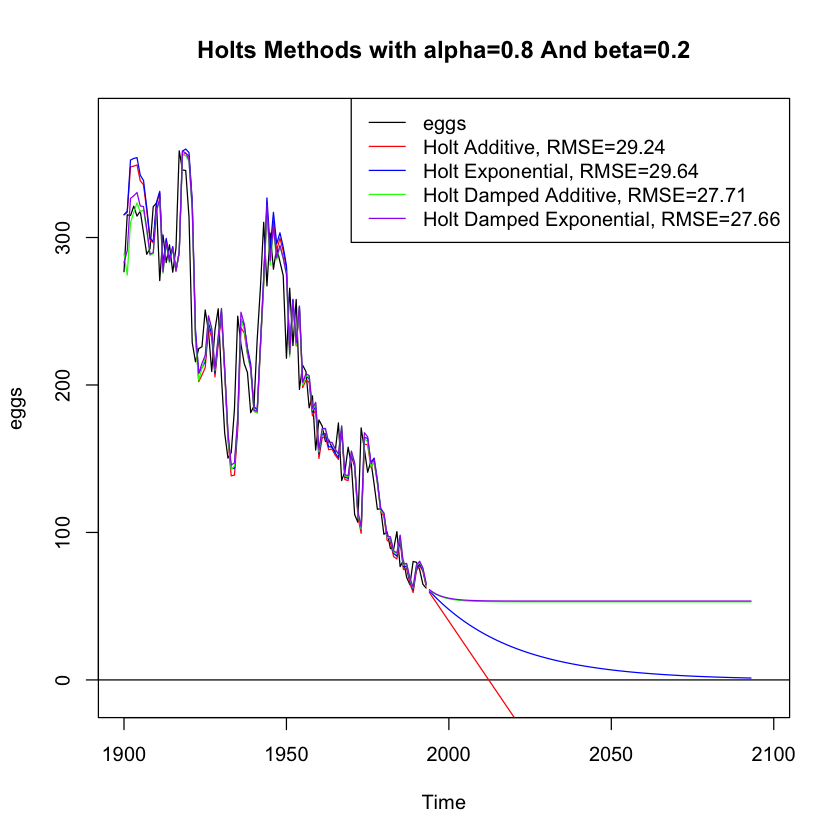

In [155]:
holtPlotsDifferentMethodsSameAlphaBeta(100, .8, .2)

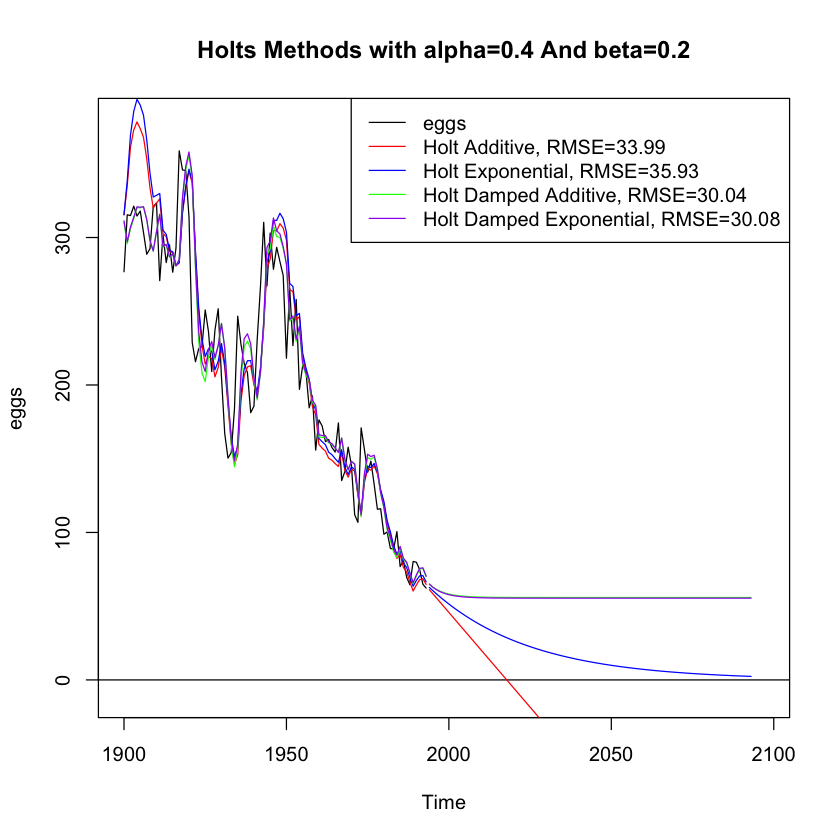

In [130]:
holtPlotsDifferentMethodsSameAlphaBeta(100, .4, .2)

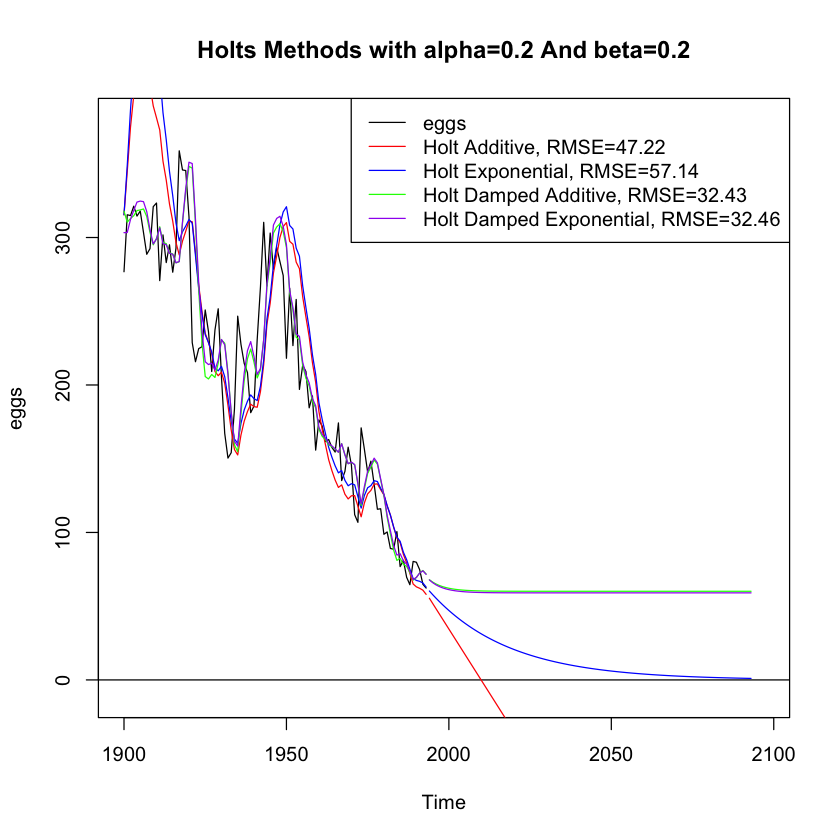

In [131]:
holtPlotsDifferentMethodsSameAlphaBeta(100, .2, .2)

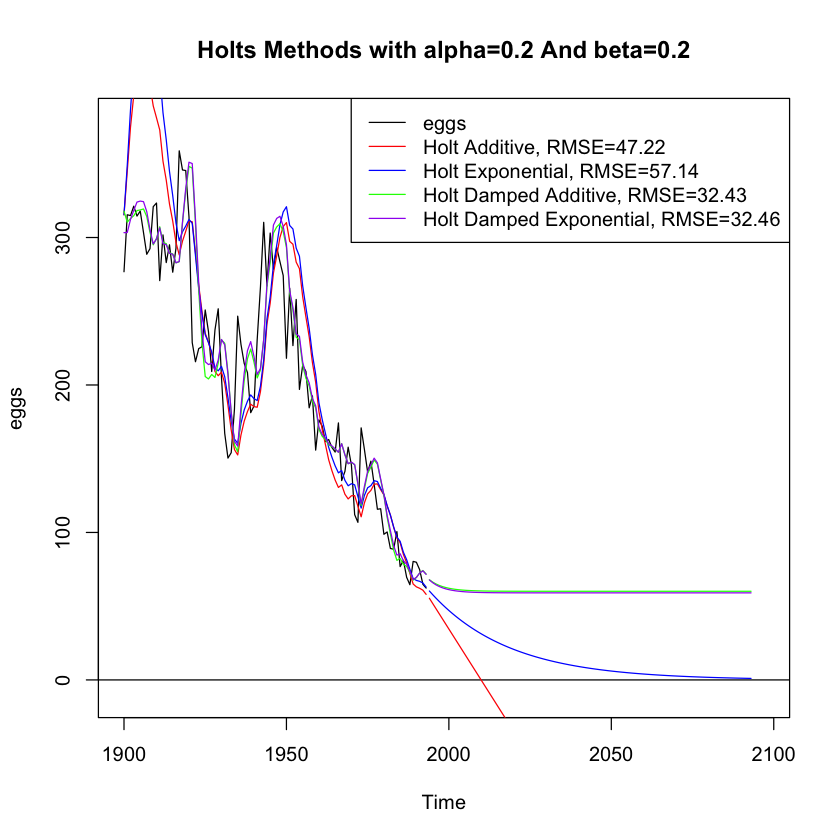

In [156]:
holtPlotsDifferentMethodsSameAlphaBeta(100, .2, .3)

In [157]:
# Function to plot the 4 Holt Methods together with user supplied values
holtPlotsSameMethodDifferentAlphaSameBeta = function(forecastLength, dampedVal, exponentialVal, betaVal) {
    xLimBeg = start(eggs)[1]
    xLimEnd = end(eggs)[1] + forecastLength + 4
    yLimBeg = -10
    yLimEnd = max(eggs) + 20
    
    if (dampedVal==TRUE){
        initialVal = "optimal"
    } else {
        initialVal = "simple"
    }
    
    if (betaVal > .8){
        betaVal = .8
    }
    # Holt Alpha .8
    holt8 = holt(eggs
               , damped=dampedVal
               , exponential=exponentialVal
               , initial=initialVal
               , h=forecastLength
               , alpha=0.8
               , beta=betaVal)
    
    rmse8 = format(round(accuracy(holt8)[2], 2), nsmall=2)
    legend8 = paste("Alpha .8, RMSE=", rmse8, sep="")
    
    if (betaVal > .6){
        betaVal = .6
    }
    # Holt Alpha .6
    holt6 = holt(eggs
                , damped=dampedVal
                , exponential=exponentialVal
                , initial=initialVal
                , h=forecastLength
                , alpha=.6
                , beta=betaVal)
    rmse6 = format(round(accuracy(holt6)[2], 2), nsmall=2)
    legend6 = paste("Alpha .6, RMSE=", rmse6, sep="")
    
    # Cannot have a beta bigger than the alpha
    if (betaVal > .4){
        betaVal = .4
    }
    # Holt Alpha .4
    holt4 = holt(eggs
                     , damped=dampedVal
                     , exponential=exponentialVal
                     , initial=initialVal
                     , h=forecastLength
                     , alpha=.4
                     , beta=betaVal)
    rmse4 = format(round(accuracy(holt4)[2], 2), nsmall=2)
    legend4 = paste("Alpha .4, RMSE=", rmse4, sep="")
    
    
    if (betaVal > .2){
        betaVal = .2
    }
    # Holt Alpha .2
    holt2 = holt(eggs
                      , damped=dampedVal
                      , exponential=exponentialVal
                      , initial=initialVal
                      , h=forecastLength
                      , alpha=.2
                      , beta=betaVal)
    rmse2 = format(round(accuracy(holt2)[2], 2), nsmall=2)
    legend2 = paste("Alpha .2, RMSE=", rmse2, sep="")            
    
    
    # Plot
    title1 = paste(holt8$method, " Beta=", sep="")
    title = paste(title1, as.character(betaVal), sep="")
    plot(eggs, xlim=c(xLimBeg, xLimEnd), ylim=c(yLimBeg, yLimEnd), main=title)
    abline(a=0, b=0)

    # Plot the fitted values of Holt Additive
    lines(fitted(holt8), col="red")
    # Plot the forecasted values of Holt Additive
    lines(holt8$mean, col="red")

    # Plot the fitted values of Holt Exponential
    lines(fitted(holt6), col="blue")
    # Plot the forecasted values of Holt Exponential
    lines(holt6$mean, col="blue")

    # Plot the fitted values of Holt Damped Additive
    lines(fitted(holt4), col="green")
    # Plot the forecasted values of Holt Damped Additive
    lines(holt4$mean, col="green")

    # Plot the fitted values of Holt Damped Exponential
    lines(fitted(holt2), col="purple")
    # Plot the forecasted values of Holt Damped Exponential
    lines(holt2$mean, col="purple")

    legend("topright"
           , lty=1
           , col=c("black", "red", "blue", "green", "purple")
           , c("eggs"
               , legend8
               , legend6
               , legend4
               , legend2)
           )
}

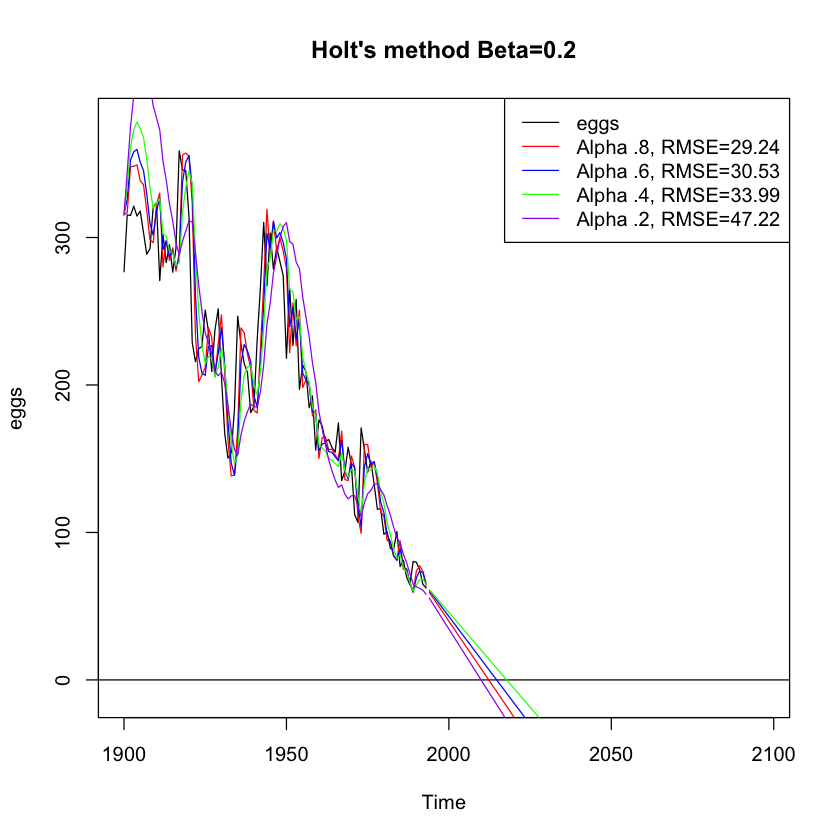

In [158]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, FALSE, FALSE, betaVal=0.2)

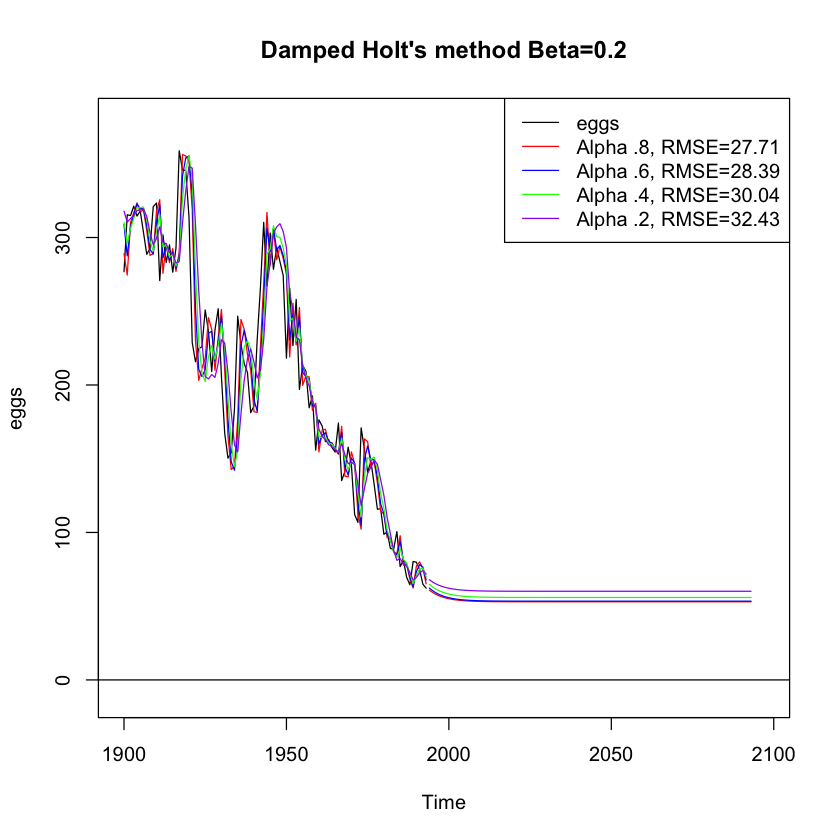

In [126]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, TRUE, FALSE, betaVal=0.2)

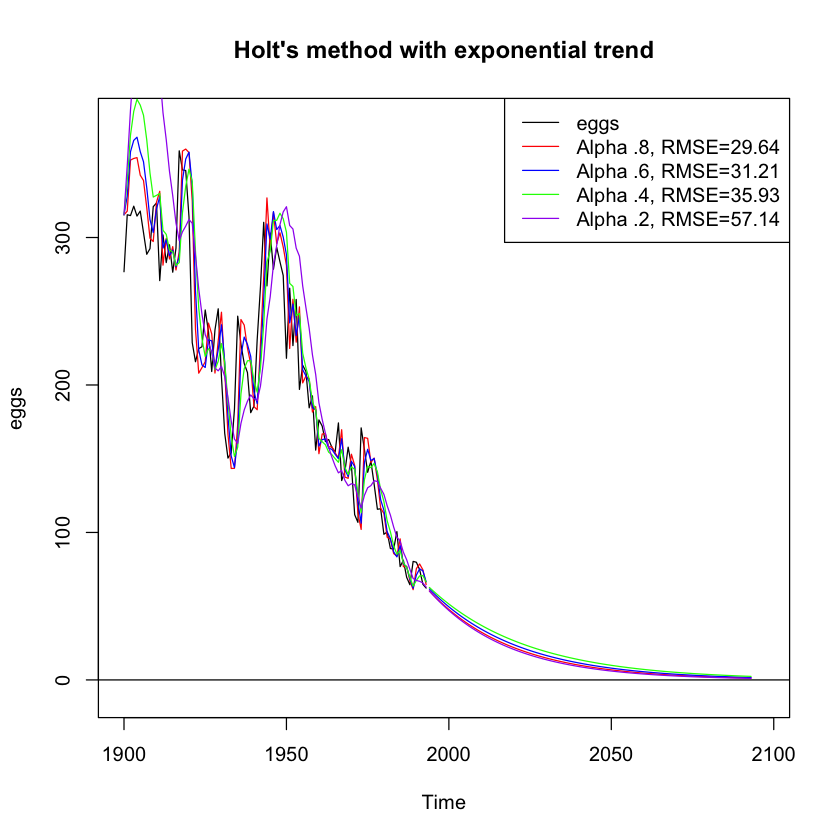

In [111]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, FALSE, TRUE, betaVal=0.2)

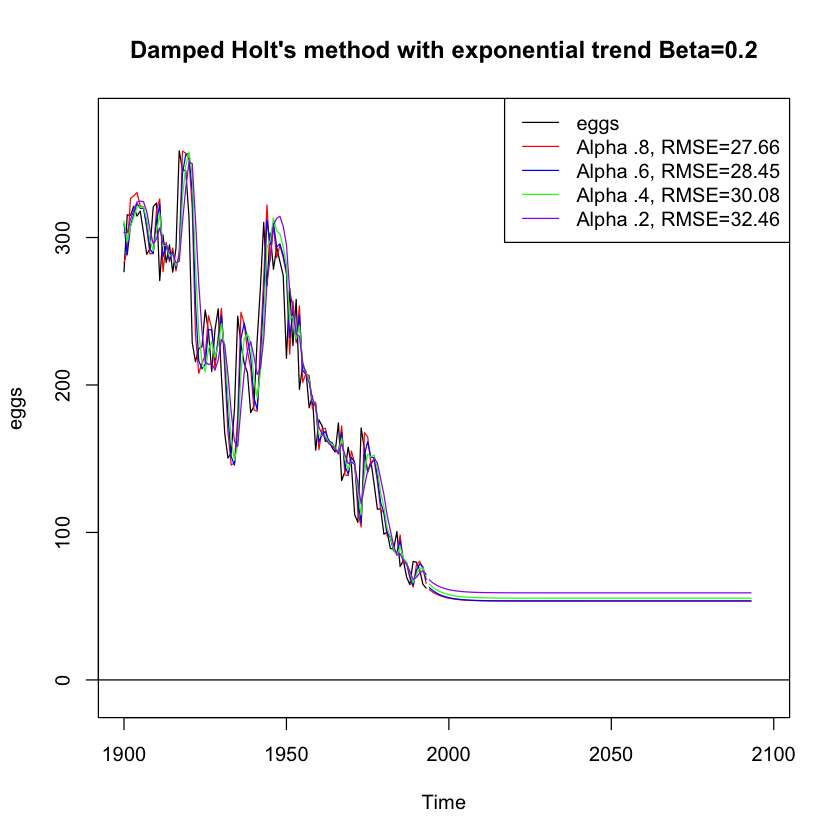

In [127]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, TRUE, TRUE, betaVal=0.2)

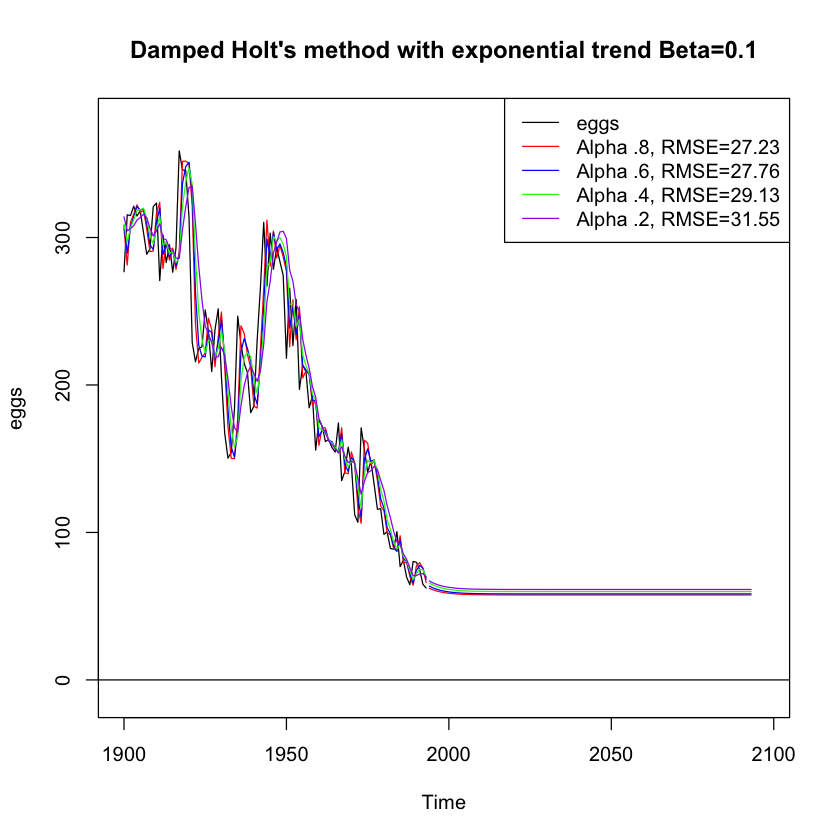

In [129]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, TRUE, TRUE, betaVal=0.1)

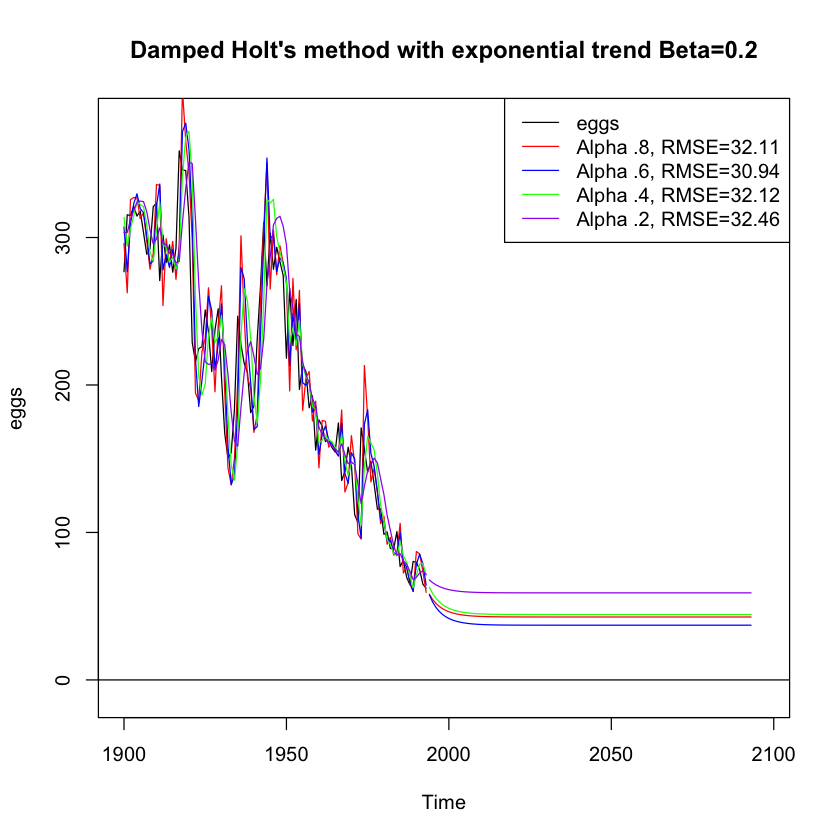

In [159]:
holtPlotsSameMethodDifferentAlphaSameBeta(100, TRUE, TRUE, betaVal=0.8)

With this dataset the RMSE is smaller for bigger Alpha values, that means the more recent observations tell the story better than the older observations